# Final Project: Data Wrangling and SQL (Pacmann)

# 1. Import Library

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

# warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
con = sqlite3.connect('D:\PACMAN\SQL\olist.db')


In [3]:
df = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)
df

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


# 

# 2. Objectives

1. Perusahaan ingin mengetahui berapa tingkat kepuasaan pelanggan secara umum?
2. Perusahaan ingin mengetahui bagaimana komposisi rating yang diberikan pelanggan?
3. Perusahaan ingin mengetahui bagaimana tren tingkat kepuasaan pelanggan? 
4. Perusahaan ingin mengetahui apa saja lima jenis barang yang paling banyak mendapatkan rating 5?
5. Perusahaan ingin mengetahui apa saja lima jenis barang yang paling banyak mendapatkan rating 1?

Berdasarkan pertanyaan-pertanyaan tersebut, maka tabel yang dipakai yaitu:
1. Tabel order dari olist_order_dataset
2. Tabel review dari olist_order_reviews_dataset
3. Tabel order item dari olist_order_items_dataset
4. Tabel product dari olist_products_dataset
5. Tabel product category dari product_category_name_translation

# 

# 3. Data Load

In [4]:
# Membuat query tabel order
query = """
SELECT * FROM olist_order_dataset
"""

# Mengakses tabel order
order = pd.read_sql(query, con)
order

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [5]:
# Membuat query table review
query = """
SELECT * FROM olist_order_reviews_dataset
"""

# Mengakses table review
review = pd.read_sql(query, con)
review

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...,...
99219,99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13


In [6]:
# Membuat query tabel order_items
query = """
SELECT * FROM olist_order_items_dataset
"""

# Mengakses tabel order_items
order_items = pd.read_sql(query, con)
order_items

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
# # Membuat query tabel product
query = """
SELECT * FROM olist_products_dataset
"""

# Mengakses tabel product
product = pd.read_sql(query, con)
product

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [8]:
# # Membuat query tabel product_category
query = """
SELECT * FROM product_category_name_translation
"""

# Mengakses tabel product_category
product_category = pd.read_sql(query, con)
product_category

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


# 

# 4. Data Cleansing

#    Tabel olist_order_dataset

In [9]:
# menampilkan tabel olist_order_dataset
order.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
# memilih kolom yang akan digunakan
order = order[['order_id', 'customer_id', 'order_purchase_timestamp']]
order.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [11]:
# cek duplicate data
order.duplicated().sum()

0

In [12]:
# cek missing value
order.isnull().sum()

order_id                    0
customer_id                 0
order_purchase_timestamp    0
dtype: int64

In [13]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_purchase_timestamp  99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [14]:
# mengubah tipe data kolom order_purchase_timestamp menjadi date
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])


In [15]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 2.3+ MB


In [16]:
order.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


# Tabel olist_order_reviews_dataset

In [17]:
# menampilkan tabel olist_order_reviews_dataset
review.head()

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
# memilih kolom yang akan digunakan
review = review[['order_id', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 
                 'review_answer_timestamp']]
review.head()

,order_id,review_id,review_score,review_comment_title,review_comment_message,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,7bc2406110b926393aa56f80a40eba40,4,None,None,2018-01-18 21:46:59
1,a548910a1c6147796b98fdf73dbeba33,80e641a11e56f04c1ad469d5645fdfde,5,None,None,2018-03-11 03:05:13
2,f9e4b658b201a9f2ecdecbb34bed034b,228ce5500dc1d8e020d8d1322874b6f0,5,None,None,2018-02-18 14:36:24
3,658677c97b385a9be170737859d3511b,e64fb393e7b32834bb789ff8bb30750e,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 22:02:06
4,8e6bfb81e283fa7e4f11123a3fb894f1,f7c4243c7fe1938f181bec41a392bdeb,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-02 10:26:53


In [19]:
# cek duplicate data
review.duplicated().sum()

0

In [20]:
# cek missing value
review.isnull().sum()

order_id                       0
review_id                      0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_answer_timestamp        0
dtype: int64

In [21]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   order_id                 99224 non-null  object
 1   review_id                99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.5+ MB


In [22]:
# memasukkan nilai ke dalam kolom review_comment_title dan kolom review_comment_message

review.fillna("Unfilled by customer", inplace = True)
review.head()


,order_id,review_id,review_score,review_comment_title,review_comment_message,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,7bc2406110b926393aa56f80a40eba40,4,Unfilled by customer,Unfilled by customer,2018-01-18 21:46:59
1,a548910a1c6147796b98fdf73dbeba33,80e641a11e56f04c1ad469d5645fdfde,5,Unfilled by customer,Unfilled by customer,2018-03-11 03:05:13
2,f9e4b658b201a9f2ecdecbb34bed034b,228ce5500dc1d8e020d8d1322874b6f0,5,Unfilled by customer,Unfilled by customer,2018-02-18 14:36:24
3,658677c97b385a9be170737859d3511b,e64fb393e7b32834bb789ff8bb30750e,5,Unfilled by customer,Recebi bem antes do prazo estipulado.,2017-04-21 22:02:06
4,8e6bfb81e283fa7e4f11123a3fb894f1,f7c4243c7fe1938f181bec41a392bdeb,5,Unfilled by customer,Parabéns lojas lannister adorei comprar pela I...,2018-03-02 10:26:53


In [23]:
# mengubah tipe data kolom review_answer_timestamp menjadi date
review['review_answer_timestamp'] = pd.to_datetime(review['review_answer_timestamp'])

# mengubah tipe data kolom review_score menjadi float
review['review_score'] = review['review_score'].astype(float)


In [24]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 99224 non-null  object        
 1   review_id                99224 non-null  object        
 2   review_score             99224 non-null  float64       
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 4.5+ MB


In [25]:
review.head()

,order_id,review_id,review_score,review_comment_title,review_comment_message,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,7bc2406110b926393aa56f80a40eba40,4.0,Unfilled by customer,Unfilled by customer,2018-01-18 21:46:59
1,a548910a1c6147796b98fdf73dbeba33,80e641a11e56f04c1ad469d5645fdfde,5.0,Unfilled by customer,Unfilled by customer,2018-03-11 03:05:13
2,f9e4b658b201a9f2ecdecbb34bed034b,228ce5500dc1d8e020d8d1322874b6f0,5.0,Unfilled by customer,Unfilled by customer,2018-02-18 14:36:24
3,658677c97b385a9be170737859d3511b,e64fb393e7b32834bb789ff8bb30750e,5.0,Unfilled by customer,Recebi bem antes do prazo estipulado.,2017-04-21 22:02:06
4,8e6bfb81e283fa7e4f11123a3fb894f1,f7c4243c7fe1938f181bec41a392bdeb,5.0,Unfilled by customer,Parabéns lojas lannister adorei comprar pela I...,2018-03-02 10:26:53


# Tabel olist_order_items_dataset

In [26]:
# menampilkan olist_order_items_dataset
order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [27]:
# memilih kolom yang akan digunakan
order_items = order_items[['order_id', 'order_item_id', 'product_id',]]
order_items.head()

,order_id,order_item_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089


In [28]:
# cek duplicate data
order_items.duplicated().sum()

0

In [29]:
# cek missing value
order_items.isnull().sum()

order_id         0
order_item_id    0
product_id       0
dtype: int64

In [30]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   order_id       112650 non-null  object
 1   order_item_id  112650 non-null  int64 
 2   product_id     112650 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


# Tabel olist_products_dataset

In [31]:
# menampilkan tabel olist_products_dataset
product.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [32]:
# memilih kolom yang akan digunakan
product = product[['product_id', 'product_category_name']]
product.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [33]:
# cek duplicate data
product.duplicated().sum()

0

In [34]:
# cek missing value
product.isnull().sum()

product_id                 0
product_category_name    610
dtype: int64

In [35]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [36]:
# memasukkan nilai ke dalam kolom product_category_name yang kosong
product.fillna("Unknown", inplace = True)
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32951 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


# Tabel product_category_name_translation

In [37]:
# menampilkan tabel product_category_name_translation
product_category.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [38]:
# memilih kolom yang akan digunakan
product_category = product_category[['product_category_name', 'product_category_name_english']]
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [39]:
# cek duplicate data
product_category.duplicated().sum()

0

In [40]:
# cek missing value
product_category.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [41]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


# Join tabel product dan product category

In [42]:
# join table products dan product_category berdasarkan kolom product_category_name
new_products = pd.merge(product, product_category, on='product_category_name', how='left')
new_products.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [43]:
# drop product_category_name
new_products = new_products.drop('product_category_name', axis=1)

# rename kolom product_category_name_english menjadi product_category_name
new_products = new_products.rename(columns={'product_category_name_english': 'product_name'})
new_products.head()

,product_id,product_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [44]:
# cek missing value
new_products.isnull().sum()

product_id        0
product_name    623
dtype: int64

In [45]:
# mengisi missing value dengan 'unknown'
new_products['product_name'] = new_products['product_name'].fillna('unknown')

# cek missing value
new_products.isnull().sum()

product_id      0
product_name    0
dtype: int64

In [46]:
# cek inkonsistensi format
new_products['product_name'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'unknown', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
     

# 

# 5. Analisa

# Komposisi rating

In [47]:
# menampilkan statistik deskriptif
review['review_score'].describe()


count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

     Rating  Frequency  Percentage
1.0     1.0      11424   11.513344
2.0     2.0       3151    3.175643
3.0     3.0       8179    8.242965
4.0     4.0      19142   19.291704
5.0     5.0      57328   57.776344


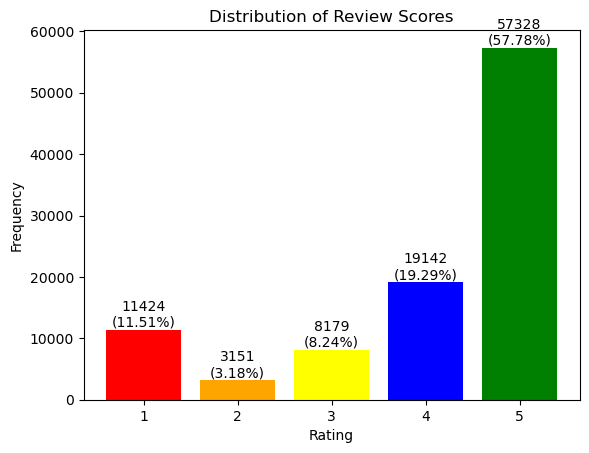

In [48]:

# menghitung frekuensi tiap rating
rating_counts = review['review_score'].value_counts().sort_index()

# menghitung persentase tiap rating
rating_percentages = rating_counts / len(review) * 100

# membuat tabel dengan frekuensi dan persentase rating
rating_table = pd.DataFrame({'Rating': rating_counts.index, 'Frequency': rating_counts, 'Percentage': rating_percentages})
rating_table = rating_table.sort_values(by='Rating')

# menampilkan tabel
print(rating_table)

# menentukan warna untuk tiap rating
colors = ['red', 'orange', 'yellow', 'blue', 'green']

# menampilkan grafik
plt.bar(rating_table['Rating'], rating_table['Frequency'], color=colors)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores')

# menampilkan analisis deskriptif di dalam grafik
for i in range(len(rating_table)):
    rating = rating_table['Rating'].iloc[i]
    freq = rating_table['Frequency'].iloc[i]
    perc = rating_table['Percentage'].iloc[i]
    plt.text(rating, freq, f'{freq}\n({perc:.2f}%)', ha='center', va='bottom')

plt.show()


Dari grafik didapat bahwa rating 5 paling banyak diberikan dalam review score yaitu sebesar 57328 atau sebesar 57,78%. Sementara itu yang paling sedikit diberikan rating nya dalam review score yaitu rating 2 yaitu sebesar 3151 atau sebesar 3,18%. Untuk rating 1 sebesar 11424 atau 11,51%. Persentase rating 3 dan 4 sendiri secara berurutan yaitu sebesar 8,24% dan 19,29%. 
Jika diasumsikan:
rating 5 = sangat puas,
rating 4 = puas,
rating 3 = cukup,
rating 2 = tidak puas,
rating 1 = sangat tidak puas,
maka secara umum tingkat kepuasan pelanggan olist e-commerce berada di level sangat puas. Namun yang menjadi perhatian juga adalah rating 1 yang jumlahnya cukup besar. Bahkan lebih besar dari rating 3 (cukup).


# Tren rating

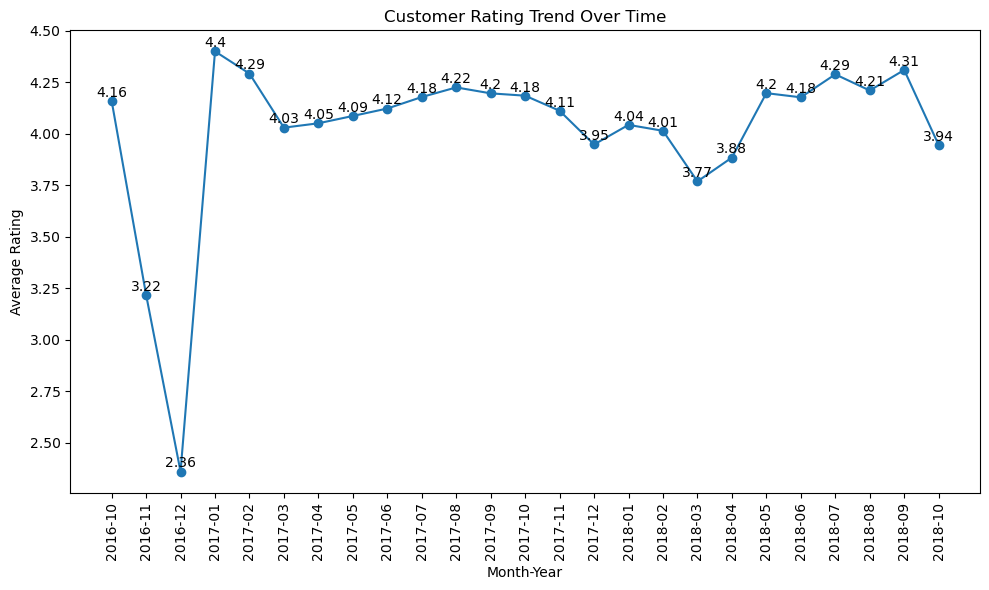

In [49]:
# Mengonversi kolom timestamp menjadi tipe data datetime
review['review_answer_timestamp'] = pd.to_datetime(review['review_answer_timestamp'])

# Mengelompokkan data berdasarkan bulan dan menghitung rata-rata rating
monthly_rating = review.groupby(review['review_answer_timestamp'].dt.to_period('M'))['review_score'].mean()

# Mengubah indeks menjadi format bulan-tahun
monthly_rating.index = monthly_rating.index.strftime('%Y-%m')

# Menampilkan tren rating berdasarkan waktu
plt.figure(figsize=(10, 6))
plt.plot(monthly_rating.index, monthly_rating, marker='o')
plt.xlabel('Month-Year')
plt.ylabel('Average Rating')
plt.title('Customer Rating Trend Over Time')
plt.xticks(rotation=90)

# Menampilkan nilai rating pada setiap titik data
for i in range(len(monthly_rating)):
    rating = monthly_rating.iloc[i]
    plt.annotate(text=str(round(rating, 2)), xy=(monthly_rating.index[i], rating),
                 xytext=(0, 3), textcoords='offset points', ha='center')

plt.tight_layout()
plt.show()


Berdasarkan grafik dapat diketahui bahwa tren rating nya cukup stabil di angka 4. Walaupun sempat drop di bulan desember 2016, tren rating kembali stabil. Karena menarik untuk diulas maka analisis dilanjutkan pada review saat rating sempat drop di bulan desember 2016.

In [50]:
# Mengambil judul komentar dan ulasan review dengan rating 1 pada Desember 2016
# Menentukan rentang waktu yang diinginkan
start_date = pd.to_datetime('2016-12-01')
end_date = pd.to_datetime('2016-12-31')

# Melakukan filtrasi berdasarkan rating dan rentang waktu
filtered_data = review[(review['review_score'].isin([1])) & (review['review_answer_timestamp'] >= start_date) & (review['review_answer_timestamp'] <= end_date)]

# Menampilkan judul, ulasan review, dan terjemahan dengan rating 1 pada rentang waktu tertentu
rating_drop_desember_2016= filtered_data[['review_comment_title', 'review_comment_message']]

rating_drop_desember_2016.head()

,review_comment_title,review_comment_message
68,Unfilled by customer,O produto não chegou no prazo estipulado e cau...
6768,Unfilled by customer,Um absurdo um cliente se sujeitar a um prazo d...
7345,Unfilled by customer,Fiquei muito chateada pois deixei de comprar d...
10750,Unfilled by customer,Atrasos acontecem nenhuma empresa está livre d...
15481,Unfilled by customer,Não entregaram o produto e se recusaram a forn...


In [51]:
# menerjemahkan ulasan review ke bahasa indonesia
from googletrans import Translator

# Membuat objek Translator
translator = Translator()

# Mendefinisikan fungsi untuk menerjemahkan teks
def translate_text(text):
    translation = translator.translate(text, src='pt', dest='id')
    return translation.text

# Menerjemahkan teks dalam kolom 'review_comment_message'
rating_drop_desember_2016['review_comment_message_ind'] = rating_drop_desember_2016['review_comment_message'].apply(translate_text)

# Menampilkan hasil terjemahan
print(rating_drop_desember_2016)


       review_comment_title  \
68     Unfilled by customer   
6768   Unfilled by customer   
7345   Unfilled by customer   
10750  Unfilled by customer   
15481  Unfilled by customer   
18400  Unfilled by customer   
22319  Unfilled by customer   
23544  Unfilled by customer   
24326  Unfilled by customer   
24409  Unfilled by customer   
25495  Unfilled by customer   
31748  Unfilled by customer   
33434  Unfilled by customer   
44604  Unfilled by customer   
45356  Unfilled by customer   
50560  Unfilled by customer   
58565  Unfilled by customer   
59625  Unfilled by customer   
60831  Unfilled by customer   
63288  Unfilled by customer   
67976  Unfilled by customer   
71835  Unfilled by customer   
72693  Unfilled by customer   
73266  Unfilled by customer   
74430  Unfilled by customer   
75570  Unfilled by customer   
81672  Unfilled by customer   
83473  Unfilled by customer   
87747  Unfilled by customer   
88826  Unfilled by customer   

                                  revi

In [52]:
# menampilkan ulasan dalam bahasa indonesia
review_ind= rating_drop_desember_2016['review_comment_message_ind'].tolist()
review_ind

['Produk itu tidak tiba dalam waktu yang ditentukan dan menyebabkan ketidaknyamanan, karena saya menjadwalkan perjalanan liburan anak saya, berdasarkan waktu.Saya tinggal di Bahia dan dia di Cuiabá sendirian.Sekarang rumahnya kosong.',
 'Absurd Seorang pelanggan mengalami terlalu banyak waktu pengiriman yang lama dan masih belum menerima produk.',
 'Saya sangat kesal karena saya berhenti membeli dari penjual lain dan setelah beberapa hari saya menerima email yang menyatakan bahwa produk tersebut tidak dapat dikirimkan, membeli dan tidak menerima sangat membosankan.',
 'Penundaan terjadi tidak ada perusahaan yang bebas melalui masalah logistik.Tetapi fakta bahwa mereka tidak mengomunikasikan klien akhir mereka memalukan.Bahkan pasar bebas memiliki kendali atas penundaan!',
 'Mereka tidak mengirimkan produk dan menolak untuk memberikan penjelasan tentang alasannya.Saya meminta klarifikasi lebih lanjut, saya mendapat jawaban.Saya berniat untuk menyelesaikan di pengadilan.Saya terluka!',
 

Setelah analisa lebih jauh tentang review yang drop di bulan Desember 2016, ternyata didapat beberapa hal yang membuat penggan kecewa. Mulai dari keterlambatan pengiriman, produk yang tidak sampai ke pelanggan, hingga produk yang bermasalah. Hal ini tentu harus menjadi point serius yang harus di evaluasi sehingga, pelanggan merasa puas.

# Barang berdasarkan rating

In [53]:
# Menggabungkan tabel review, order, dan order_items berdasarkan kolom 'order_id'
rating_product= pd.merge(review, order, on='order_id')
rating_product= pd.merge(rating_product, order_items, on='order_id')

# Menggabungkan tabel new_product berdasarkan kolom 'product_id'
rating_product = pd.merge(rating_product, new_products, on='product_id')
rating_product.head()

,order_id,review_id,review_score,review_comment_title,review_comment_message,review_answer_timestamp,customer_id,order_purchase_timestamp,order_item_id,product_id,product_name
0,73fc7af87114b39712e6da79b0a377eb,7bc2406110b926393aa56f80a40eba40,4.0,Unfilled by customer,Unfilled by customer,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,2018-01-11 15:30:49,1,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure
1,73fc7af87114b39712e6da79b0a377eb,7bc2406110b926393aa56f80a40eba40,4.0,Unfilled by customer,Unfilled by customer,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,2018-01-11 15:30:49,2,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure
2,19721d59a9764437477eff0730b48665,e2655da8bccce2ddc2f43cc2c80d24f3,5.0,Unfilled by customer,Unfilled by customer,2018-04-11 11:30:43,b1757da2a461d581e1a3b280ca181b7c,2018-03-26 11:02:31,1,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure
3,efd626e6a12a82d76e456e34093f8356,cb18f53b563f0bdeb76be0376ddd6b6a,5.0,Unfilled by customer,Unfilled by customer,2017-12-30 12:07:50,da2bd16b131bc90653b87fe4d8fd266e,2017-12-07 20:33:24,1,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure
4,a548910a1c6147796b98fdf73dbeba33,80e641a11e56f04c1ad469d5645fdfde,5.0,Unfilled by customer,Unfilled by customer,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,2018-02-28 12:25:19,1,be0dbdc3d67d55727a65d4cd696ca73c,computers_accessories


In [54]:
rating_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112372 entries, 0 to 112371
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112372 non-null  object        
 1   review_id                 112372 non-null  object        
 2   review_score              112372 non-null  float64       
 3   review_comment_title      112372 non-null  object        
 4   review_comment_message    112372 non-null  object        
 5   review_answer_timestamp   112372 non-null  datetime64[ns]
 6   customer_id               112372 non-null  object        
 7   order_purchase_timestamp  112372 non-null  datetime64[ns]
 8   order_item_id             112372 non-null  int64         
 9   product_id                112372 non-null  object        
 10  product_name              112372 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usag

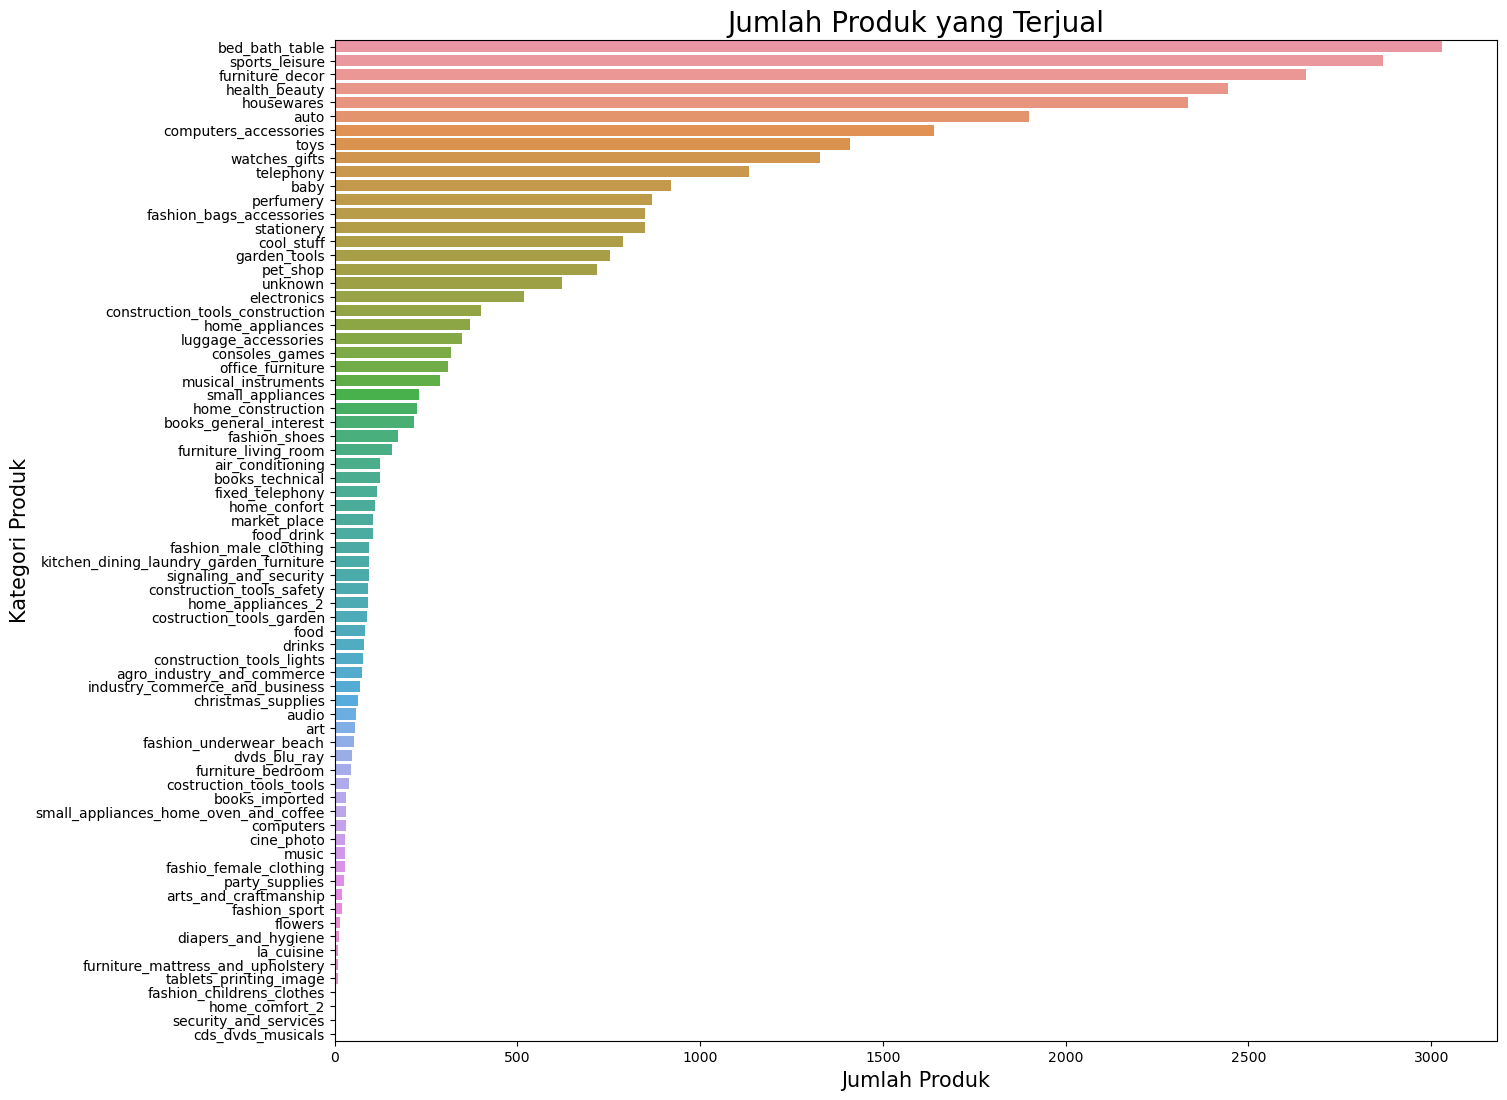

In [55]:
# menghitung jumlah produk yang terjual dan menampilkannya dalam bentuk bar plot
plt.figure(figsize=(15, 13))
sns.countplot(y='product_name', data=new_products, order=new_products['product_name'].value_counts().index)
plt.title('Jumlah Produk yang Terjual', fontsize=20)
plt.xlabel('Jumlah Produk', fontsize=15)
plt.ylabel('Kategori Produk', fontsize=15)
plt.show()

In [56]:
# melakukan filtrasi barang berdasarkan rating
rating_1_products = rating_product[rating_product['review_score'] == 1]['product_name']
rating_2_products = rating_product[rating_product['review_score'] == 2]['product_name']
rating_3_products = rating_product[rating_product['review_score'] == 3]['product_name']
rating_4_products = rating_product[rating_product['review_score'] == 4]['product_name']
rating_5_products = rating_product[rating_product['review_score'] == 5]['product_name']


In [57]:
# filter DataFrame untuk rating 5
rating_5_products = rating_product.loc[rating_product['review_score'] == 5.0, 'product_name']
print(rating_5_products.unique())

['sports_leisure' 'computers_accessories' 'garden_tools' 'bed_bath_table'
 'toys' 'home_confort' 'small_appliances' 'health_beauty' 'pet_shop'
 'cool_stuff' 'electronics' 'baby' 'luggage_accessories' 'watches_gifts'
 'auto' 'telephony' 'fashion_bags_accessories' 'perfumery' 'housewares'
 'furniture_decor' 'home_appliances_2' 'food_drink' 'musical_instruments'
 'stationery' 'books_imported' 'office_furniture' 'books_general_interest'
 'construction_tools_construction' 'construction_tools_safety' 'art'
 'home_appliances' 'computers' 'christmas_supplies' 'audio' 'unknown'
 'industry_commerce_and_business' 'furniture_living_room' 'consoles_games'
 'market_place' 'drinks' 'kitchen_dining_laundry_garden_furniture'
 'furniture_bedroom' 'la_cuisine' 'signaling_and_security'
 'home_construction' 'food' 'books_technical'
 'small_appliances_home_oven_and_coffee' 'cine_photo' 'air_conditioning'
 'agro_industry_and_commerce' 'furniture_mattress_and_upholstery' 'music'
 'home_comfort_2' 'fashion_und

In [58]:
# filter DataFrame untuk rating 1
rating_1_products = rating_product.loc[rating_product['review_score'] == 1.0, 'product_name']
print(rating_1_products.unique())


['computers_accessories' 'garden_tools' 'bed_bath_table' 'toys'
 'home_confort' 'small_appliances' 'health_beauty' 'pet_shop' 'cool_stuff'
 'electronics' 'luggage_accessories' 'watches_gifts' 'telephony' 'baby'
 'sports_leisure' 'perfumery' 'furniture_decor' 'auto' 'food_drink'
 'housewares' 'stationery' 'musical_instruments' 'books_imported'
 'office_furniture' 'construction_tools_construction'
 'construction_tools_safety' 'fashion_bags_accessories' 'art'
 'home_appliances' 'computers' 'christmas_supplies' 'audio' 'unknown'
 'industry_commerce_and_business' 'furniture_living_room' 'consoles_games'
 'drinks' 'home_construction' 'food' 'books_technical'
 'small_appliances_home_oven_and_coffee' 'air_conditioning' 'market_place'
 'books_general_interest' 'agro_industry_and_commerce' 'music'
 'home_appliances_2' 'furniture_bedroom' 'la_cuisine'
 'fashion_underwear_beach' 'construction_tools_lights'
 'kitchen_dining_laundry_garden_furniture' 'costruction_tools_tools'
 'signaling_and_securit

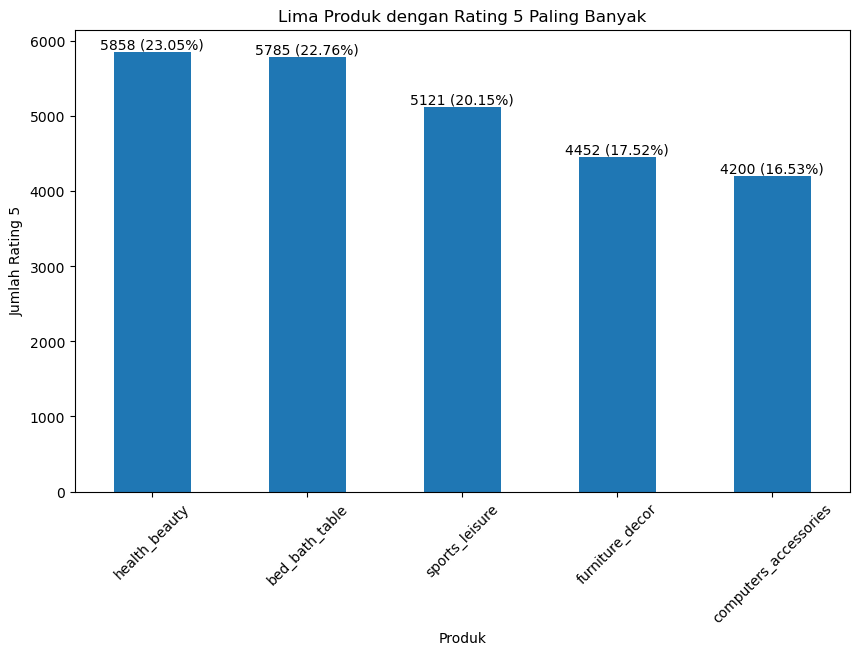

In [59]:
# Mengambil lima jenis barang dengan rating 5 paling banyak
top_5_products = rating_product.loc[rating_product['review_score'] == 5, 'product_name'].value_counts().head(5)

# Menampilkan grafik lima jenis barang dengan rating 5 paling banyak
plt.figure(figsize=(10, 6))
top_5_products.plot(kind='bar')
plt.title('Lima Produk dengan Rating 5 Paling Banyak')
plt.xlabel('Produk')
plt.ylabel('Jumlah Rating 5')
plt.xticks(rotation=45)

# Menampilkan jumlah rating 5 dan persentasenya di atas setiap batang grafik
for i, count in enumerate(top_5_products):
    percent = (count / top_5_products.sum()) * 100
    plt.text(i, count, f'{count} ({percent:.2f}%)', ha='center', va='bottom')

plt.show()


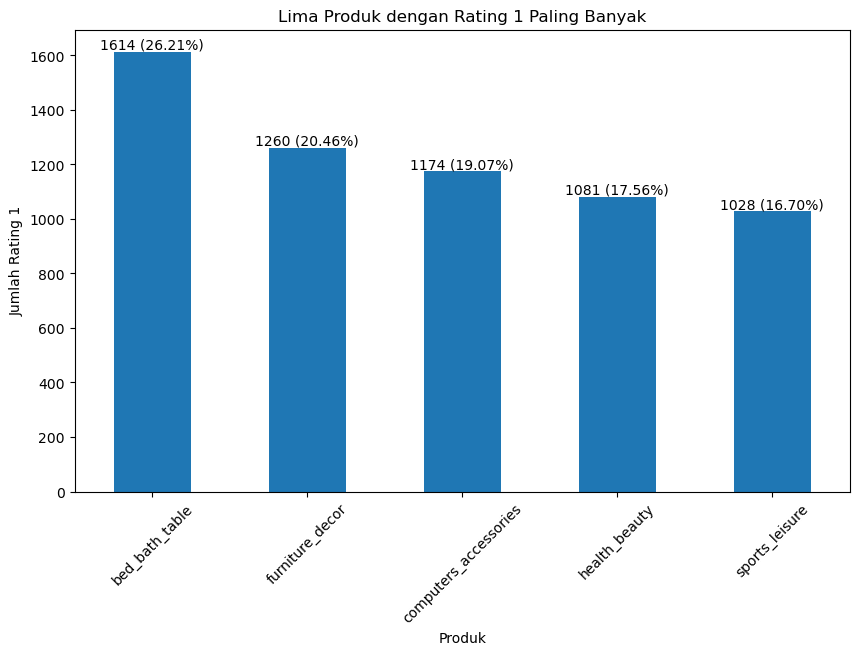

In [60]:
# Mengambil lima jenis barang dengan rating 1 paling banyak
top_1_products = rating_product.loc[rating_product['review_score'] == 1, 'product_name'].value_counts().head(5)

# Menampilkan grafik lima jenis barang dengan rating 5 paling banyak
plt.figure(figsize=(10, 6))
top_1_products.plot(kind='bar')
plt.title('Lima Produk dengan Rating 1 Paling Banyak')
plt.xlabel('Produk')
plt.ylabel('Jumlah Rating 1')
plt.xticks(rotation=45)

# Menampilkan jumlah rating 1 dan persentasenya di atas setiap batang grafik
for i, count in enumerate(top_1_products):
    percent = (count / top_1_products.sum()) * 100
    plt.text(i, count, f'{count} ({percent:.2f}%)', ha='center', va='bottom')

plt.show()


Berdasarkan data tersebut didapat bahwa lima produk yang paling banyak mendapat rating 5 yaitu secara berurutan health beauty, bed bath table,sport leisure, furniture decor, dan computer accessories. Sedangkan lima produk yang paling banyak mendapat rating 1 yaitu secara berurutan bed bath table, furniture decor, computers accessories, health_beauty, dan sport leisure. Ternyata 5 jenis barang yang paling banyak mendapat rating 5, juga termasuk di dalam 5 jenis barang yang paling banyak mendapatkan rating 1. Ini sejalan dengan barang-barang yang paling banyak terjual, dimana barang-barang tersebut termasuk didalamnya. Hal ini berarti menunjukkan barang-barang tersebut menjadi barang yang disukai pelanggan dan pelanggan puas dengan barang-barang tersebut. Ini dibuktikan dengan rating 5 yang diberikan kepada barang-barang tersebut lebih banyak daripada rating 1 yang diberikan. Namun tetap harus menjadi evaluasi untuk meningkatkan kulaitas produk dan ketepatan pengiriman untuk barang-barang tersebut dan juga barang-barang lainnya yang dijual di Olist e-commerce.